<img height="20" src="dataset-cover.jpeg" width="90" alt="Roey Zalta" id="tmg_logo" title="Data Analysis Kimonaim Dataset">
<body style="background-color:tomato;">
<center><h1>Spotify Top Hits Year 1999-2019 - Exploratory Data Analysis</h1></center>
    </body>

<b><CENTER><div style ='background:red;dont-size:15px'><div style ='color:white;dont-size:15px'>IF YOU ALREADY RAN THE API IMPORT STAGE, SKIP IT AND GO STRIGH TO THE IMPORT CSV STAGE </div></CENTER></b>
    

In [ ]:
#import Kaggle API
!pip install kaggle

In [ ]:
#validate the api file exists in computer
!mkdir ~/.kaggle

In [ ]:
#look for the kimonaim dataset in kaggle
!kaggle datasets list -s 'Top Hits Spotify from 2000-2019'

In [ ]:
#import the kimonaim dataset
!kaggle datasets download -d paradisejoy/top-hits-spotify-from-20002019

In [ ]:
#unzip the dataset zip file 
!unzip top-hits-spotify-from-20002019.zip 

<b><CENTER><div style ='background:lightgreen;dont-size:15px'> RUN THE CODE FROM HERE IF YOU ALREADY IMPORTED THE API </div></CENTER></b>

In [1]:
# First let's import the packages we will use in this project
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [26]:
#Read in the data
df=pd.read_csv('songs_normalize.csv')

In [3]:
#let's look at the data
df.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


## Data Cleaning

In [4]:
#check precents of missing data
for col in df.columns: 
    pct_missing = np.mean(df[col].isnull())
    print('{}-{}%'.format(col,pct_missing))

artist-0.0%
song-0.0%
duration_ms-0.0%
explicit-0.0%
year-0.0%
popularity-0.0%
danceability-0.0%
energy-0.0%
key-0.0%
loudness-0.0%
mode-0.0%
speechiness-0.0%
acousticness-0.0%
instrumentalness-0.0%
liveness-0.0%
valence-0.0%
tempo-0.0%
genre-0.0%


<b><div style ='background:lightgreen;dont-size:15px'> We can see our data is clean and has 0% null values </div></b>

In [5]:
#check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   explicit          2000 non-null   bool   
 4   year              2000 non-null   int64  
 5   popularity        2000 non-null   int64  
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          2000 non-null   float64
 10  mode              2000 non-null   int64  
 11  speechiness       2000 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           2000 non-null   float64
 16  tempo             2000 non-null   float64


<b><div style ='background:lightgreen;dont-size:15px'> Let's see how many songs in each year </div></b>

In [6]:
df.sort_values(by=['year'] , inplace = True , ascending = True)
df['year'].value_counts().sort_values(ascending = True)

1998      1
2020      3
1999     38
2000     74
2009     84
2013     89
2019     89
2002     90
2007     94
2006     95
2004     96
2003     97
2008     97
2011     99
2015     99
2016     99
2005    104
2014    104
2010    107
2018    107
2001    108
2017    111
2012    115
Name: year, dtype: int64

<b><div style ='background:lightgreen;dont-size:15px'> Deleted data from irelavent years.</div> </b>

In [7]:
# Remove songs from 1998 and 2020
df = df.loc[~df['year'].isin([1998, 2020])]
# Add duration_min column
df['duration_min'] = (df['duration_ms'] / 1000) / 60
df.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,duration_min
82,Savage Garden,Crash and Burn,281466,False,1999,54,0.581,0.607,4,-8.458,1,0.0280,0.18900,0.000002,0.0882,0.213,102.030,pop,4.691100
123,Crazy Town,Butterfly,216733,False,1999,71,0.736,0.811,9,-4.170,0,0.0810,0.00132,0.000142,0.1070,0.609,103.502,"rock, metal",3.612217
34,Britney Spears,Born to Make You Happy,243533,False,1999,58,0.633,0.922,11,-4.842,0,0.0454,0.11600,0.000465,0.0710,0.686,84.110,pop,4.058883
35,Montell Jordan,Get It On Tonite,276266,False,1999,59,0.813,0.491,10,-9.923,0,0.0770,0.24100,0.000046,0.0817,0.868,99.008,"hip hop, pop, R&B",4.604433
74,Madison Avenue,Don't Call Me Baby,228140,False,1999,56,0.808,0.982,3,-6.588,0,0.0311,0.05850,0.006890,0.3500,0.961,124.999,Dance/Electronic,3.802333


### 1. Which genre is the most popular?

In [8]:
df.groupby('genre', as_index=False)['popularity'].sum()

,genre,popularity
0,Dance/Electronic,2122
1,"Folk/Acoustic, pop",156
2,"Folk/Acoustic, rock",0
3,"Folk/Acoustic, rock, pop",68
4,R&B,786
5,"World/Traditional, Folk/Acoustic",69
6,"World/Traditional, hip hop",61
7,"World/Traditional, pop",61
8,"World/Traditional, pop, Folk/Acoustic",135
9,"World/Traditional, rock",120


<AxesSubplot:xlabel='genre', ylabel='popularity'>

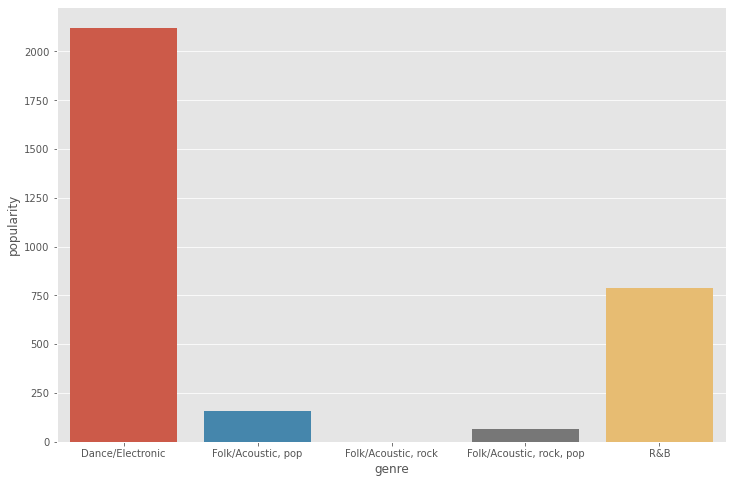

In [9]:
# displays the sum of popularity for the top 5 genres 
df_to_plot = df.groupby('genre', as_index=False)['popularity'].sum().head(5).sort_index()
sns.barplot(data=df_to_plot, x='genre', y='popularity')

<b><div style ='background:lightgreen;dont-size:15px'> Let's check if this rank was the same for each year </div></b>

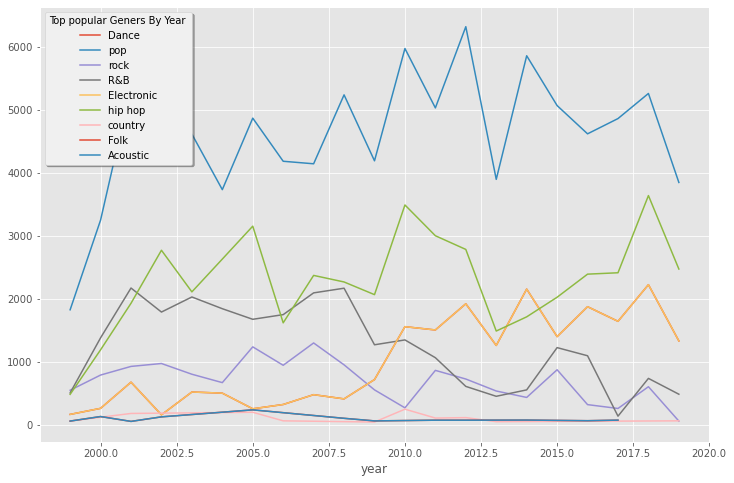

In [23]:
# Create masks for filter the data
Dance = df['genre'].str.contains("Dance", case=False)
pop = df['genre'].str.contains("pop", case=False)
rock = df['genre'].str.contains("rock", case=False)
RnB = df['genre'].str.contains("R&B", case=False)
Electronic = df['genre'].str.contains("Electronic", case=False)
hip_hop = df['genre'].str.contains("hip hop", case=False)
country = df['genre'].str.contains("country", case=False)
Folk = df['genre'].str.contains("Folk", case=False)
Acoustic = df['genre'].str.contains("Acoustic", case=False)


# Add series to the chart
df[Dance].groupby('year')['popularity'].sum().plot.line( label='Dance')
df[pop].groupby('year')['popularity'].sum().plot.line( label='pop')
df[rock].groupby('year')['popularity'].sum().plot.line( label='rock')
df[RnB].groupby('year')['popularity'].sum().plot.line( label='R&B')
df[Electronic].groupby('year')['popularity'].sum().plot.line( label='Electronic')
df[hip_hop].groupby('year')['popularity'].sum().plot.line( label='hip hop')
df[country].groupby('year')['popularity'].sum().plot.line( label='country')
df[Folk].groupby('year')['popularity'].sum().plot.line( label='Folk')
df[Acoustic].groupby('year')['popularity'].sum().plot.line( label='Acoustic')

# Limit the range of x-axis
# plt.ylim(0,12000)

# Add legend
plt.legend(loc='best', 
           labels=['Dance','pop','rock','R&B','Electronic','hip hop','country','Folk','Acoustic'], 
           shadow=True,
           framealpha=1, 
           facecolor='0.94',
           title='Top popular Geners By Year ')

<b><div style ='background:lightgreen;dont-size:15px'> pop music was the most popular by far in every year. and also Hipho, rnb and country had a com </div></b>

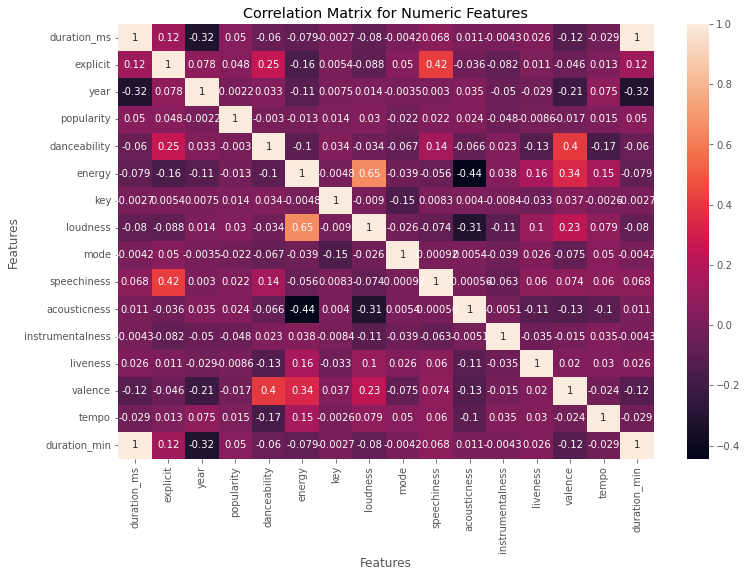

In [25]:
#create correlation matrix to all features
correlation_matrix = df.corr(method='pearson')
sns.heatmap(correlation_matrix,annot = True)
plt.title ('Correlation Matrix for Numeric Features')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

<b><div style ='background:lightgreen;dont-size:15px'> we see no correlation between poularity to any of the other features </div></b>